<a href="https://colab.research.google.com/github/RamAngothu/DEEP_LEARNING/blob/main/Object_detection_using_yolo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

**Uploading Image**

In [266]:
image = cv2.imread("/content/car detection.jpg")

In [267]:
type(image)

numpy.ndarray

In [268]:
image.shape

(1080, 1920, 3)

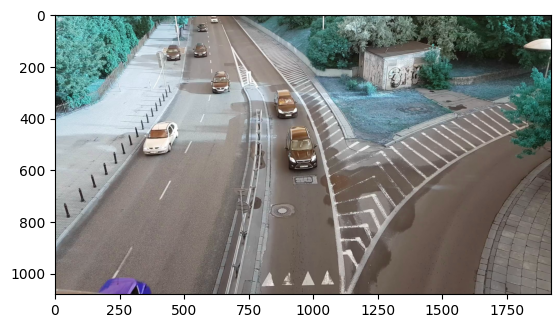

In [269]:
plt.imshow(image)

**converting BGR to RGB**

In [270]:
new_image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

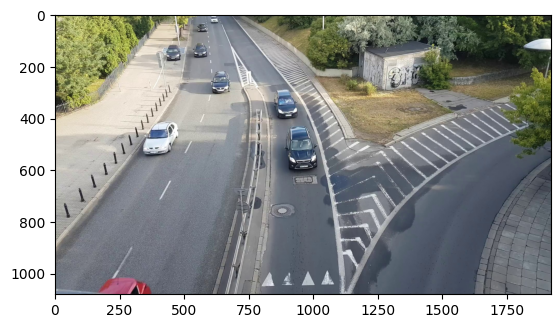

In [271]:
plt.imshow(new_image)

**YOLO V3  Model**

In [272]:
yolo = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [273]:
classes = []

with open ("/content/coco.names",'r') as f:
  classes = f.read().splitlines()

In [274]:
len(classes)

80

In [288]:
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush']

In [276]:
new_image.shape

(1080, 1920, 3)

**Splitting height and width**

In [277]:
height, width = image.shape[:2]

In [278]:
blob = cv2.dnn.blobFromImage(image, scalefactor=1/255.0, size=(320,320), mean=(0,0,0), swapRB=True, crop=False)

In [279]:
blob.shape

(1, 3, 320, 320)

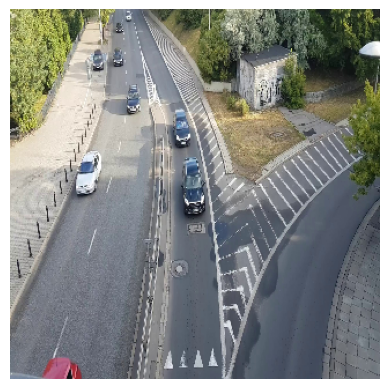

In [280]:
new_image = blob.squeeze(0)  # Removes the batch dimension
plt.imshow(new_image.transpose(1, 2, 0))  # Convert (3, H, W) → (H, W, 3)
plt.axis("off")  # Optional: Hides axis
plt.show()

**Setting Input for YOLO**

In [281]:
yolo.setInput(blob)

In [282]:
output_layer_name = yolo.getUnconnectedOutLayers()
outputs = yolo.forward(output_layer_name)

In [283]:
boxes = []
confidences = []
class_ids = []

In [284]:
# Check Image Shape
print("Image shape:", new_image.shape)

Image shape: (3, 320, 320)


In [285]:
image = cv2.imread("/content/car detection.jpg").copy()

🛠 Total detections before NMS: 21
✅ Objects detected after NMS: 9
Indices after NMS: [ 4  3  2  5  6  1  0 18 20]


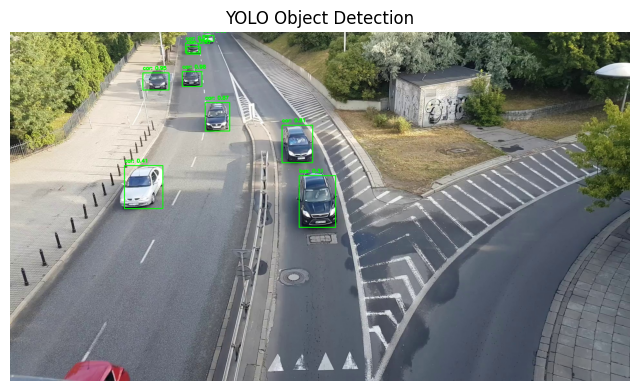

In [287]:

# Confidence threshold (adjust as needed)
conf_threshold = 0.3
nms_threshold = 0.5

# Process YOLO outputs
for output in outputs:
    for detection in output:
        scores = detection[5:]  # Class probabilities
        class_id = np.argmax(scores)
        confidence = scores[class_id]

        if confidence > conf_threshold:
            # YOLO outputs relative coordinates (center_x, center_y, width, height)
            center_x, center_y, w, h = (detection[0:4] * np.array([width, height, width, height])).astype("int")

            # Convert to (x, y) coordinates
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


# Check detections before NMS
print(f"🛠 Total detections before NMS: {len(boxes)}")


# Apply Non-Maximum Suppression (NMS) to remove overlapping boxes
indices = cv2.dnn.NMSBoxes(boxes, confidences, conf_threshold, nms_threshold)


# Check if any indices were kept after NMS
if len(indices) == 0:
    print("⚠️ No objects detected after NMS. Try lowering the confidence threshold.")
else:
    indices = indices.flatten() if isinstance(indices, np.ndarray) else np.array(indices).flatten()
    print(f"✅ Objects detected after NMS: {len(indices)}")

print("Indices after NMS:", indices)

image_copy = image.copy()  # Ensure we modify a copy

for i in indices:
    x, y, w, h = boxes[i]
    color = (0, 255, 0)  # Green
    cv2.rectangle(image_copy, (x, y), (x + w, y + h), color, 2)
    cv2.putText(image_copy, f"{classes[class_ids[i]]}: {confidences[i]:.2f}",
                (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

plt.figure(figsize=(8, 8))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))  # Convert BGR to RGB
plt.axis("off")
plt.title("YOLO Object Detection")
plt.show()

